**Data augmentation can address a variety of challenges when training a CNN model, such as limited or imbalanced data, overfitting, and variation and complexity. This technique can increase the size of the dataset and balance the classes by applying different transforsmation.**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.',untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses=list(data_dir.glob('roses/*')) #This glob is used to store the path of the object which contain roses
roses[:5]

[PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/5526964611_76ef13025c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5333437251_ce0aa6925d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg')]

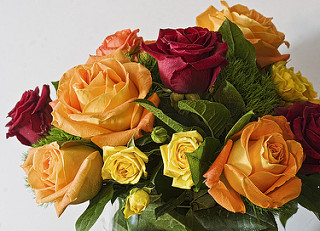

In [ ]:
PIL.Image.open(str(roses[1]))

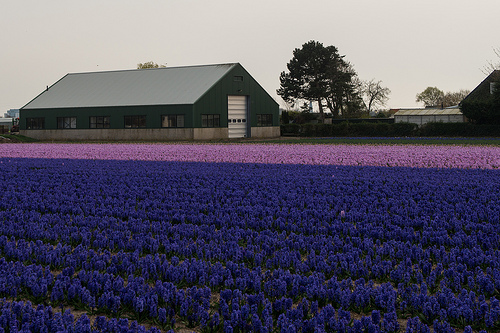

In [ ]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/5526964611_76ef13025c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5333437251_ce0aa6925d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2627513944_b1361e60ec_m.jpg'),
 PosixPath('datasets/flower_photos/roses/17700322054_1c4fdaa034_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7865295712_bcc94d120c.jpg'),
 PosixPath('datasets/flower_photos/roses/2607130050_9c34310004.jpg'),
 PosixPath('datasets/flower_photos/roses/17090993740_fcc8b60b81.jpg'),
 PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9164900485_605aa12da8.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),


In [ ]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/7538403124_f2fc48750a.jpg'),
 PosixPath('datasets/flower_photos/daisy/4229503616_9b8a42123c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3598615130_578ed30e5f.jpg'),
 PosixPath('datasets/flower_photos/daisy/446484749_4044affcaf_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14021430525_e06baf93a9.jpg'),
 PosixPath('datasets/flower_photos/daisy/488202750_c420cbce61.jpg'),
 PosixPath('datasets/flower_photos/daisy/3506866918_61dd5fc53b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3588872598_e0f9a1d2a1_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/14551098743_2842e7a004_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8696022686_1f8d62c5cb_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5679288570_b4c52e76d5.jpg'),
 PosixPath('datasets/flower_photos/daisy/5110105726_53eb7a93be_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/15306268004_4680ba95e1.jpg'),
 PosixPath('datasets/flower_photos/daisy/22244161124_53e457bb66_n.jpg'),
 P

In [ ]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':3,
    'tulips':4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/6053143173_991c011b23.jpg'

In [ ]:
img=cv2.imread(str(flowers_images_dict['roses'][0])) #This will take the path and return a numpy array
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [ ]:
len(X_train)

2228

In [ ]:
len(X_test)

743

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
      layers.Dense(128,activation='relu'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
70/70 [==============================] - 76s 1s/step - loss: 2.7164 - accuracy: 0.3784
Epoch 2/5
70/70 [==============================] - 89s 1s/step - loss: 2.2635 - accuracy: 0.5211
Epoch 3/5
70/70 [==============================] - 80s 1s/step - loss: 2.0997 - accuracy: 0.5597
Epoch 4/5
70/70 [==============================] - 88s 1s/step - loss: 2.0331 - accuracy: 0.5848
Epoch 5/5
70/70 [==============================] - 78s 1s/step - loss: 1.9585 - accuracy: 0.6037


In [ ]:
model.evaluate(X_test_scaled,y_test)   #On training set it gives high accuracy were as in test dataset it gives low accuracy(overfitting case)please run more epochs i run low number of epochs because it takes lots of time you can run around 30 epochs there you see high differece in accuracy

24/24 [==============================] - 7s 277ms/step - loss: 2.3405 - accuracy: 0.5195


[2.3404595851898193, 0.5195154547691345]

In [ ]:
predictions=model.predict(X_test_scaled)
predictions

24/24 [==============================] - 9s 337ms/step


array([[1.2710562, 3.5133896, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [5.1823287, 7.3335466, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [5.5269413, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [4.9071536, 5.603794 , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.3366413, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [5.087567 , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [ ]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([0.01784258, 0.16799279, 0.00500547, 0.18848075, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500

In [ ]:
np.argmax([0,78,123,8])
score

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([0.01784258, 0.16799279, 0.00500547, 0.18848075, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500547, 0.00500547, 0.00500547, 0.00500547, 0.00500547,
       0.00500

In [ ]:
np.argmax(score)

3

In [ ]:
y_test[0]

3

In [ ]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),

    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),

])

NameError: name 'img_height' is not defined

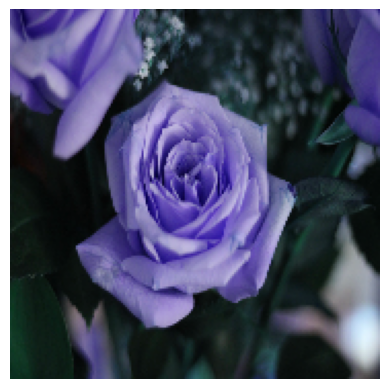

In [ ]:
plt.axis('off')
plt.imshow(X[0])

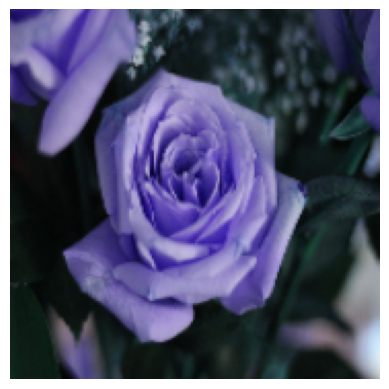

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=8)

Epoch 1/8
70/70 [==============================] - 75s 1s/step - loss: 1.2293 - accuracy: 0.4713
Epoch 2/8
70/70 [==============================] - 78s 1s/step - loss: 0.9212 - accuracy: 0.6234
Epoch 3/8
70/70 [==============================] - 75s 1s/step - loss: 0.7986 - accuracy: 0.6894
Epoch 4/8
70/70 [==============================] - 72s 1s/step - loss: 0.6220 - accuracy: 0.7496
Epoch 5/8
70/70 [==============================] - 73s 1s/step - loss: 0.4579 - accuracy: 0.8241
Epoch 6/8
70/70 [==============================] - 83s 1s/step - loss: 0.3157 - accuracy: 0.8909
Epoch 7/8
70/70 [==============================] - 75s 1s/step - loss: 0.2235 - accuracy: 0.9192
Epoch 8/8
70/70 [==============================] - 77s 1s/step - loss: 0.1388 - accuracy: 0.9578


In [ ]:
model.evaluate(X_test_scaled,y_test)        #You can clearly see the difference between before the data augmentation and after the augmentation the accuracy of model on test data

24/24 [==============================] - 9s 355ms/step - loss: 1.6430 - accuracy: 0.5787


[1.6430482864379883, 0.5787348747253418]